### Imports

In [1]:
import os
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.datasets as datasets
from tensorflow import data
import matplotlib.pyplot as plt

keras.utils.set_random_seed(123)

### Clean and Sort data

In [2]:
data_location = "dataset"

og_all_ds, og_val_ds = keras.utils.image_dataset_from_directory(
    "dataset",
    validation_split=0.1,
    subset="both",
    shuffle=True,
    seed=1337,
    batch_size=32,
)

class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

Found 4217 files belonging to 4 classes.
Using 3796 files for training.
Using 421 files for validation.


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


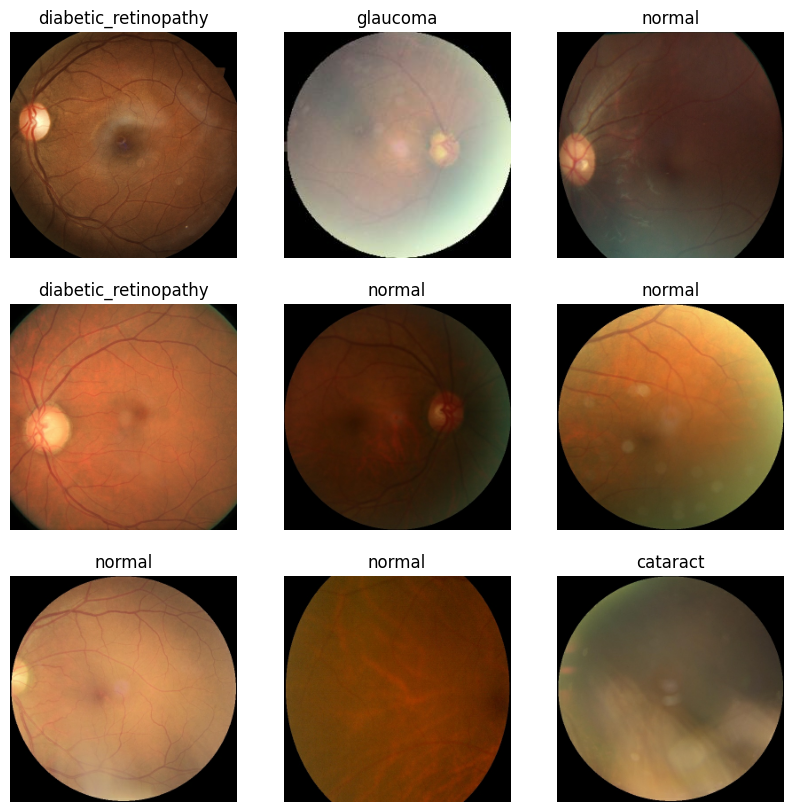

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in og_all_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
all_ds = og_all_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = og_val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(all_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
image_batch, labels_batch = next(iter(val_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


test_ds = all_ds.take(12)
train_ds = all_ds.skip(12)

print(len(list(train_ds.as_numpy_iterator())))
print(len(list(val_ds.as_numpy_iterator())))
print(len(list(test_ds.as_numpy_iterator())))

0.0 1.0
0.0 0.67549026
107
14
12


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100


107/107 [==============================] - 114s 1s/step - loss: 1.0500 - sparse_categorical_accuracy: 0.5618 - val_loss: 0.6722 - val_sparse_categorical_accuracy: 0.7102
Epoch 2/100
107/107 [==============================] - 113s 1s/step - loss: 0.6760 - sparse_categorical_accuracy: 0.7060 - val_loss: 0.6934 - val_sparse_categorical_accuracy: 0.7173
Epoch 3/100
107/107 [==============================] - 115s 1s/step - loss: 0.6011 - sparse_categorical_accuracy: 0.7374 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 0.7981
Epoch 4/100
107/107 [==============================] - 120s 1s/step - loss: 0.5114 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.7862
Epoch 5/100
107/107 [==============================] - 109s 1s/step - loss: 0.5082 - sparse_categorical_accuracy: 0.7822 - val_loss: 0.5236 - val_sparse_categorical_accuracy: 0.7910
Epoch 6/100
107/107 [==============================] - 105s 969ms/step - loss: 0.4820 - sparse_categor

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
[(array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

      

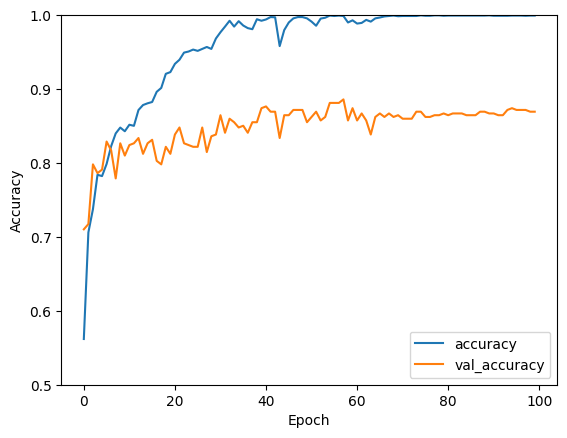

In [11]:
print(history.history.keys())

plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

print(list(test_ds.as_numpy_iterator()))

test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_loss)
print(test_acc)
